**Set environment**

In [1]:
suppressMessages(source("../config_sing.R"))

You are in singularity_proj_combeffect 
BASE DIRECTORY:     /mount/work 
PATH OF SOURCE:     /mount/work/source 
PATH OF EXECUTABLE: /mount/work/exe 
PATH OF ANNOTATION: /mount/work/annotation 
PATH OF PROJECT:    /mount/project 
PATH OF RESULTS:    /mount/work/out/proj_combeffect 


In [5]:
library(pheatmap)

## Import table

In [26]:
### Helper function to get
get_group = function(idn_sample){
    idn = idn_sample
    idn = str_replace(
        string = idn, 
        pattern = "Input[0-9]_20x", 
        replacement = "Input")
    idn = str_replace(
        string = idn, 
        pattern = "TFX[0-9]_", 
        replacement="TFX_")
    return(idn)
}

In [32]:
fdiry = file.path(FD_RES, 'database')
fname = "fragment_annot_map_per1.csv"
fpath = file.path(fdiry, fname)

dat = read_csv(fpath)
dat = dat %>% mutate(Group = get_group(Sample))
dat_annot_map = dat
head(dat_annot_map)

Rows: 6494 Columns: 254
── Column specification ──────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr   (3): Fragment, Sample, Chrom
dbl (251): Count, Start, End, Mid, Len, Pct_GC, Input_20x, TFX_DMSO_vs_Inp20...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Fragment,Count,Sample,Chrom,Start,End,Mid,Len,Pct_GC,Input_20x,⋯,Mtf_NR/2,Mtf_ZNF232,Mtf_HLTF,Mtf_HD/25,Mtf_AIRE,Mtf_SOX/5,Mtf_HD/7,tsne_x,tsne_y,Group
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
chr17_8148005_8149015,1,Input1_20x,chr17,8148005,8149015,8148510,1010,0.588119,-13.94994,⋯,0,0,0,0,0,0,0,-0.001437013,-0.4698937,Input
chr17_8148017_8148955,1,Input1_20x,chr17,8148017,8148955,8148486,938,0.587420,-13.93511,⋯,0,0,0,0,0,0,0,-2.077732800,0.4361626,Input
chr17_8148092_8149102,1,Input1_20x,chr17,8148092,8149102,8148597,1010,0.575248,-14.01668,⋯,0,0,0,0,0,0,0,-1.997205500,-4.8057480,Input
chr17_8148098_8149186,1,Input1_20x,chr17,8148098,8149186,8148642,1088,0.577206,-13.96881,⋯,0,0,0,0,0,0,0,0.703321930,-5.5464363,Input
chr17_8148122_8149107,1,Input1_20x,chr17,8148122,8149107,8148615,985,0.571574,-14.01590,⋯,0,0,0,0,0,0,0,-2.277785000,-5.0495744,Input
chr17_8148152_8149324,1,Input1_20x,chr17,8148152,8149324,8148738,1172,0.559727,-13.95741,⋯,0,0,0,0,0,0,0,0.840433300,-12.0732960,Input


In [83]:
colnames(dat_annot_map)

[1] "Fragment"           "Count"              "Sample"            
  [4] "Chrom"              "Start"              "End"               
  [7] "Mid"                "Len"                "Pct_GC"            
 [10] "Input_20x"          "TFX_DMSO_vs_Inp20x" "TFX_Dex_vs_Inp20x" 
 [13] "Mtf_GLIS"           "Mtf_GC-tract"       "Mtf_ZNF680"        
 [16] "Mtf_GCM"            "Mtf_NR/19"          "Mtf_ZNF143"        
 [19] "Mtf_ZFN121"         "Mtf_PLAG1"          "Mtf_CTCF"          
 [22] "Mtf_NR/16"          "Mtf_ZNF554"         "Mtf_ZNF667"        
 [25] "Mtf_ZIC"            "Mtf_ZNF423"         "Mtf_TFAP2/1"       
 [28] "Mtf_ZKSCAN1"        "Mtf_EBF1"           "Mtf_ZNF320"        
 [31] "Mtf_NR/3"           "Mtf_NR/17"          "Mtf_NFI/3"         
 [34] "Mtf_RFX/2"          "Mtf_ZNF324"         "Mtf_ZNF549"        
 [37] "Mtf_ZNF354"         "Mtf_INSM1"          "Mtf_ZSCAN3"        
 [40] "Mtf_KLF/SP/2"       "Mtf_ZIC/2"          "Mtf_NFKB/1"        
 [43] "Mtf_ETS/2"          "Mtf_ETS/1"          "Mtf_GLI"           
 [46] "Mtf_KLF/SP/1"       "Mtf_REST/NRSF"      "Mtf_CREB/ATF/2"    
 [49] "Mtf_CREB/ATF/3"     "Mtf_CREB/ATF/1"     "Mtf_ZNF563"        
 [52] "Mtf_SREBF1"         "Mtf_NR/12"          "Mtf_NR/15"         
 [55] "Mtf_ZNF528"         "Mtf_ZNF41"          "Mtf_NR/9"          
 [58] "Mtf_SNAI2"          "Mtf_ZSCAN4"         "Mtf_HD/22"         
 [61] "Mtf_Ebox/CAGATGG"   "Mtf_MYB/5"          "Mtf_Ebox/CAGCTG"   
 [64] "Mtf_Ebox/CACCTG"    "Mtf_TBX/3"          "Mtf_AP1/2"         
 [67] "Mtf_ZNF768"         "Mtf_HIC/1"          "Mtf_ZNF53"         
 [70] "Mtf_ZNF331"         "Mtf_ZNF335"         "Mtf_PAX/2"         
 [73] "Mtf_HEN1"           "Mtf_ZNF332"         "Mtf_MECP2"         
 [76] "Mtf_E2F/1"          "Mtf_SRF"            "Mtf_AP1/1"         
 [79] "Mtf_SMARCA1"        "Mtf_THAP1"          "Mtf_ZNF547"        
 [82] "Mtf_LEF1"           "Mtf_NR/4"           "Mtf_P53-like/1"    
 [85] "Mtf_SMAD"           "Mtf_ZNF257"         "Mtf_NFAT/2"        
 [88] "Mtf_RBPJ"           "Mtf_SMARCA5"        "Mtf_ZNF134"        
 [91] "Mtf_NR/5"           "Mtf_NR/18"          "Mtf_MZF1"          
 [94] "Mtf_NR/13"          "Mtf_PAX/1"          "Mtf_HD/15"         
 [97] "Mtf_NFY"            "Mtf_GATA"           "Mtf_SPDEF/1"       
[100] "Mtf_CENBP"          "Mtf_ZNF140"         "Mtf_ZFX"           
[103] "Mtf_ZBTB48"         "Mtf_ZIM3"           "Mtf_FOX/4"         
[106] "Mtf_FOX/5"          "Mtf_TCF/LEF"        "Mtf_REL-halfsite"  
[109] "Mtf_E2F/2"          "Mtf_IRF/2"          "Mtf_ZNF708"        
[112] "Mtf_TBX/4"          "Mtf_HD/18"          "Mtf_HD/20"         
[115] "Mtf_NFKB/2"         "Mtf_Ebox/CACGTG/1"  "Mtf_NR/8"          
[118] "Mtf_ZNF524"         "Mtf_GRHL"           "Mtf_YY1"           
[121] "Mtf_SPZ1"           "Mtf_POU/3"          "Mtf_ZNF136"        
[124] "Mtf_HD/2"           "Mtf_EGR"            "Mtf_NRF1"          
[127] "Mtf_OSR2"           "Mtf_MFZ1"           "Mtf_HINFP1/1"      
[130] "Mtf_ZNF449"         "Mtf_HD/12"          "Mtf_BATF"          
[133] "Mtf_FOX/3"          "Mtf_SOX/1"          "Mtf_ZNF28"         
[136] "Mtf_NFAC/2"         "Mtf_ZNF384/2"       "Mtf_SPI"           
[139] "Mtf_NR/1"           "Mtf_FOX/7"          "Mtf_TBX/1"         
[142] "Mtf_ZNF784"         "Mtf_ZNF274"         "Mtf_Ebox/CACGTG/2" 
[145] "Mtf_MAF"            "Mtf_ZNF418"         "Mtf_ZNF85"         
[148] "Mtf_FOX/1"          "Mtf_PRDM1"          "Mtf_MBD2"          
[151] "Mtf_STAT/2"         "Mtf_STAT/1"         "Mtf_RUNX/1"        
[154] "Mtf_SCRT1"          "Mtf_ZBTB6"          "Mtf_ZNF329"        
[157] "Mtf_MTF1"           "Mtf_ZNF317"         "Mtf_CREB3/XBP1"    
[160] "Mtf_TBX/2"          "Mtf_ZNF306"         "Mtf_ZNF436"        
[163] "Mtf_NR/11"          "Mtf_NFKB/3"         "Mtf_FOX/9"         
[166] "Mtf_MIES"           "Mtf_RFX/1"          "Mtf_HINFP1/3"      
[169] "Mtf_NR2E3"          "Mtf_NR/20"          "Mtf_SOX/4"         
[172] "Mtf_HD/21"          "Mtf_NFI/2"          "Mtf_NFI/1"         


## 

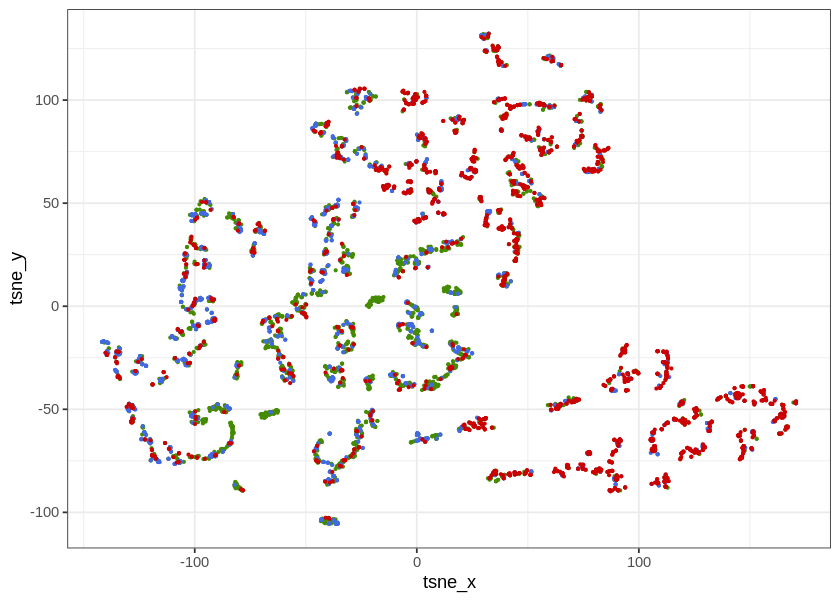

In [44]:
### init
dat = dat_annot_map
dat = dat %>% mutate(Color = recode(
        Group, 
        Input    = "Chartreuse4",
        TFX_DMSO = "royalblue",
        TFX_Dex  = "red3"))

### create plot
gpt = ggplot(dat, aes(x=tsne_x, y=tsne_y)) + geom_point(size=0.5, color=dat$Color) + theme_bw()

### plot
options(repr.plot.height=5, repr.plot.width=7)
print(gpt)

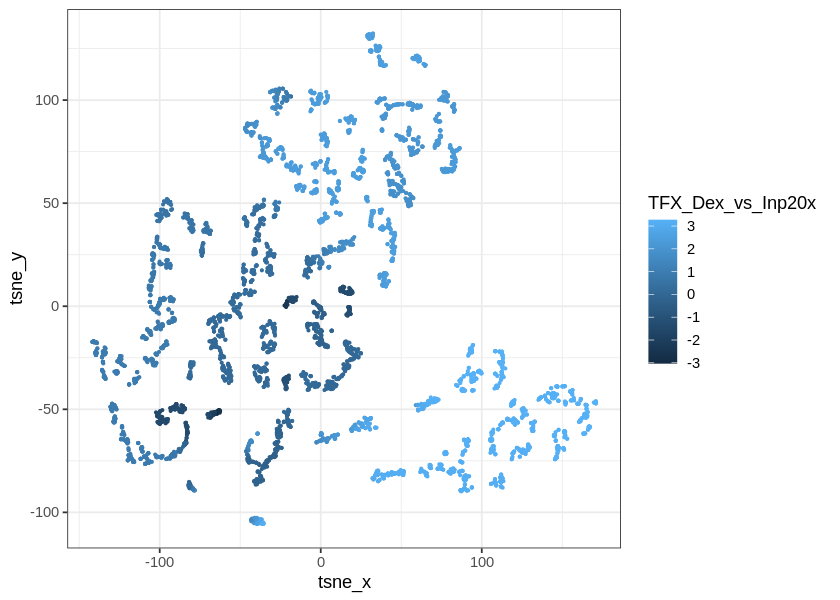

In [84]:
### init
dat = dat_annot_map

### create plot
gpt = ggplot(dat, aes(x=tsne_x, y=tsne_y, color=TFX_Dex_vs_Inp20x)) + 
    geom_point(size=0.5) + 
    theme_bw()

### plot
options(repr.plot.height=5, repr.plot.width=7)
print(gpt)

## Heatmap

In [62]:
dat = dat_annot_map %>% 
    dplyr::select(Fragment, Sample, Group) %>% 
    mutate(Color = recode(
        Group, 
        Input    = "Chartreuse4",
        TFX_DMSO = "royalblue",
        TFX_Dex  = "red3")) 

dat = dat %>% 
    mutate(FID = paste(Fragment, Sample, sep = "_")) %>% 
    dplyr::select(FID, Group) %>%
    column_to_rownames("FID")

dat_sam = dat
head(dat_sam)

,Group
,<chr>
chr17_8148005_8149015_Input1_20x,Input
chr17_8148017_8148955_Input1_20x,Input
chr17_8148092_8149102_Input1_20x,Input
chr17_8148098_8149186_Input1_20x,Input
chr17_8148122_8149107_Input1_20x,Input
chr17_8148152_8149324_Input1_20x,Input


In [66]:
dat = dat_annot_map %>% 
    mutate(FID = paste(Fragment, Sample, sep = "_")) %>% 
    dplyr::select(FID, starts_with("Mtf")) %>%
    column_to_rownames("FID")

dat_mtf = dat
head(dat_mtf)

,Mtf_GLIS,Mtf_GC-tract,Mtf_ZNF680,Mtf_GCM,Mtf_NR/19,Mtf_ZNF143,Mtf_ZFN121,Mtf_PLAG1,Mtf_CTCF,Mtf_NR/16,⋯,Mtf_DDIT3+CEBPA,Mtf_IRF/4,Mtf_OVOL1,Mtf_NR/2,Mtf_ZNF232,Mtf_HLTF,Mtf_HD/25,Mtf_AIRE,Mtf_SOX/5,Mtf_HD/7
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr17_8148005_8149015_Input1_20x,23.1883,114.21204,15.3419,7.5087,23.5700,54.69065,19.0648,11.3956,33.3872,55.26113,⋯,0,0,0,0,0,0,0,0,0,0
chr17_8148017_8148955_Input1_20x,20.6856,102.74297,15.3419,7.5087,23.5700,46.02355,4.9710,11.3956,33.3872,44.58657,⋯,0,0,0,0,0,0,0,0,0,0
chr17_8148092_8149102_Input1_20x,7.9934,98.85829,9.9656,0.0000,15.3019,55.05545,14.0938,6.8239,23.8473,44.30023,⋯,0,0,0,0,0,0,0,0,0,0
chr17_8148098_8149186_Input1_20x,7.9934,119.56041,9.9656,0.0000,15.3019,63.69285,28.1419,6.8239,23.8473,44.30023,⋯,0,0,0,0,0,0,0,0,0,0
chr17_8148122_8149107_Input1_20x,7.9934,90.53059,9.9656,0.0000,15.3019,55.05545,14.0938,6.8239,23.8473,44.30023,⋯,0,0,0,0,0,0,0,0,0,0
chr17_8148152_8149324_Input1_20x,7.9934,112.25657,9.9656,0.0000,15.3019,63.69285,28.1419,6.8239,23.8473,44.30023,⋯,0,0,0,0,0,0,0,0,0,0


In [72]:
val = apply(dat_mtf, 2, sum)
idx = order(-val)
dat_mtf = dat_mtf[,idx]
head(dat_mtf)

,Mtf_KLF/SP/2,Mtf_GC-tract,Mtf_ETS/2,Mtf_NR/3,Mtf_KLF/SP/1,Mtf_E2F/2,Mtf_ZIC/2,Mtf_Ebox/CAGATGG,Mtf_NFI/3,Mtf_TFAP2/1,⋯,Mtf_SOX/5,Mtf_HD/25,Mtf_E2F/3,Mtf_HD/7,Mtf_HLTF,Mtf_CREB/ATF/3,Mtf_OVOL1,Mtf_SOX/4,Mtf_ZNF232,Mtf_IRF/4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr17_8148005_8149015_Input1_20x,113.2763,114.21204,36.11950,97.20235,64.41225,9.0365,15.8716,35.1388,28.5939,26.3932,⋯,0,0,0,0,0,7.017,0,0,0,0
chr17_8148017_8148955_Input1_20x,104.6618,102.74297,36.11950,89.86805,64.41225,9.0365,15.8716,35.1388,28.5939,26.3932,⋯,0,0,0,0,0,7.017,0,0,0,0
chr17_8148092_8149102_Input1_20x,123.7802,98.85829,36.11950,88.98285,75.32245,17.0444,8.3043,35.1388,19.1715,17.2474,⋯,0,0,0,0,0,7.017,0,0,0,0
chr17_8148098_8149186_Input1_20x,133.1945,119.56041,43.69320,96.82865,75.32245,25.3651,8.3043,35.1388,19.1715,17.2474,⋯,0,0,0,0,0,7.017,0,0,0,0
chr17_8148122_8149107_Input1_20x,114.7484,90.53059,27.58230,88.98285,75.32245,17.0444,8.3043,35.1388,19.1715,17.2474,⋯,0,0,0,0,0,7.017,0,0,0,0
chr17_8148152_8149324_Input1_20x,125.2060,112.25657,50.40235,87.95615,63.95465,25.3651,8.3043,35.1388,19.1715,9.1579,⋯,0,0,0,0,0,0.000,0,0,0,0


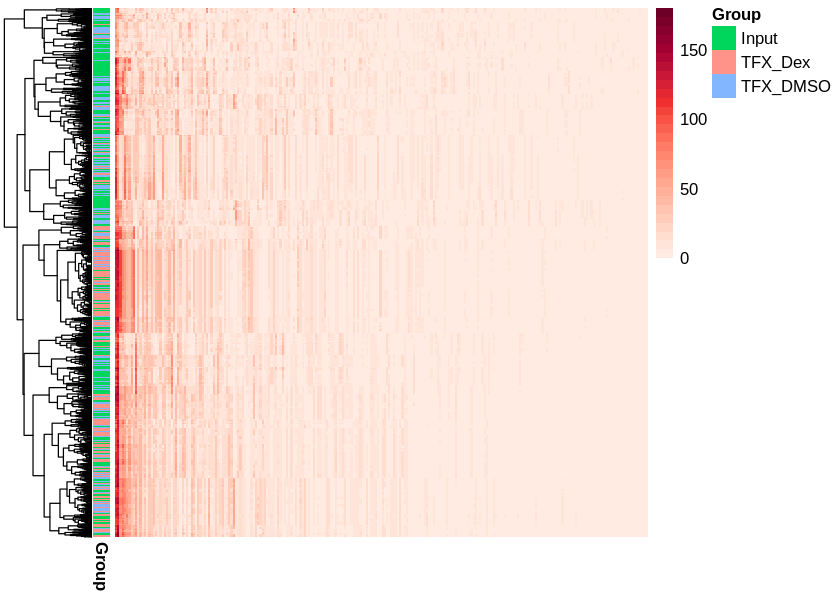

In [82]:
color = rev(hcl.colors(30, "Reds")[0:28])
pheatmap(
    dat_mtf, 
    color = color, 
    cluster_cols = FALSE,
    show_colnames  = FALSE,
    show_rownames  = FALSE,
    annotation_row = dat_sam,
    clustering_method = "complete"
)

In [80]:
rev(hcl.colors(30, "Reds")[0:25])

[1] "#FFD5C5" "#FFCCBA" "#FFC3AF" "#FFBAA5" "#FFB19A" "#FFA78F" "#FF9C85"
 [8] "#FF927A" "#FF866F" "#FF7B65" "#FF6E5A" "#FB6150" "#F85345" "#F4433B"
[15] "#EF2F30" "#E32733" "#D62036" "#C91837" "#BB1036" "#AE0635" "#A10033"
[22] "#940031" "#87002E" "#7A002A" "#6D0026"

In [16]:
brewer.pal(10, "Reds")

Warning message in brewer.pal(10, "Reds"):
“n too large, allowed maximum for palette Reds is 9
Returning the palette you asked for with that many colors
”


[1] "#FFF5F0" "#FEE0D2" "#FCBBA1" "#FC9272" "#FB6A4A" "#EF3B2C" "#CB181D"
[8] "#A50F15" "#67000D"